In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from toolbox import ToolBox

In [47]:
tb = ToolBox()

In [55]:
df = tb.load_data_sql(table='critic_reviews', use_cache=True)
df = df[~df['review'].isnull()]
df.head()

Loading from database


,game,source,date,grade,review,lang,sentiment
0,007-legends-pc,GamingXP,2012-12-03,35.0,"Unfortunately the game proves the fact, that d...",en,None
1,007-legends-pc,LEVEL (Czech Republic),2012-12-21,30.0,The worst gift agent 007 could possibly get to...,en,None
2,007-legends-pc,PC Gamer,2013-01-05,16.0,"Legends, you're the worst. [Feb 2013, p.79]",en,None
3,007-legends-pc,PC Master (Greece),2013-02-06,28.0,"Why put yourself through this ordeal, when the...",en,None
4,007-legends-pc,Riot Pixels,2013-01-29,25.0,007 Legends greets you with a warning that Act...,en,None


In [56]:
df.shape

(322070, 7)

In [95]:
df = tb.load_data_sql(table='user_reviews_clean', use_cache=True)
df = df[~df['review'].isnull()]
df.head()

Loaded from cache


,id,date,grade,game,review,sentiment
0,128002,2013-01-19,30,007-legends-pc,"Oh, my dear God! What is it with developers th...",-0.9191
1,128003,2014-06-23,30,007-legends-pc,Seriously if you want to have a HUGE laugh wit...,0.9424
2,128004,2014-12-11,0,007-legends-pc,godawful port of the xbox 360 version and ps3....,-0.3869
3,128005,2012-11-03,0,007-legends-pc,Agree. Worst game ever. Its a full copy of Cal...,0.5496
4,128006,2012-11-04,0,007-legends-pc,DO NOT BUY THIS GAME for the PC (or for any ot...,-0.9612


In [96]:
df.shape

(211773, 6)

In [97]:
print('{} unique games'.format(df.game.nunique()))

13068 unique games


In [99]:
df_agg = df.groupby('game').agg({
    'game': 'count', 
    'grade': 'mean', 
    'sentiment': 'mean',
    'date': 'min'})

df_agg = df_agg.rename(columns={'game': 'n_games'})

df_agg.head()

,n_games,grade,sentiment,date
game,,,,
007-legends-pc,25,33.600000,-0.113120,2012-11-03
007-legends-playstation-3,12,38.333333,0.118742,2012-10-16
007-legends-wii-u,5,62.000000,0.125660,2013-01-04
007-legends-xbox-360,18,43.333333,0.138222,2012-10-16
007-quantum-of-solace-pc,8,50.000000,0.033513,2011-06-22


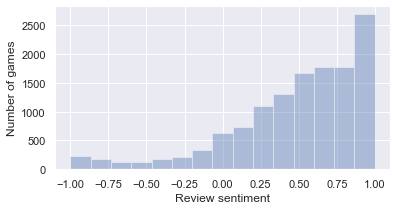

In [91]:
plt.figure(figsize=(6, 3))

sns.set(style='darkgrid')
sns.distplot(df_agg.sentiment, kde=False, bins=15);

# plt.title('Distribution of review sentiment')
plt.xlabel('Review sentiment')
plt.ylabel('Number of games');

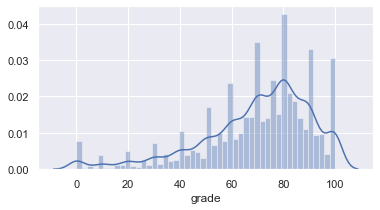

In [71]:
plt.figure(figsize=(6, 3))

sns.distplot(df_agg.grade);

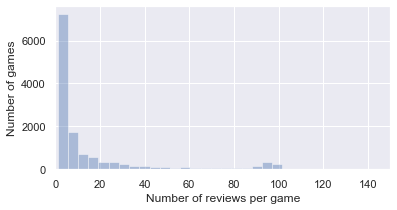

In [106]:
plt.figure(figsize=(6, 3))

sns.distplot(df_agg['n_games'], bins=100, kde=False)
plt.xlabel('Number of reviews per game')
plt.ylabel('Number of games')
plt.xlim([0,150]);

In [110]:
np.mean(df_agg['n_games'])

16.205463728191003

In [109]:
np.median(df_agg['n_games'])

4.0

In [38]:
def date_to_year_float(dates):
    start_date = dates.min()
    rel = (dates - pd.to_datetime(start_date))
    rel = rel.astype('timedelta64[D]')
    return pd.to_datetime(start_date).year + rel / 365.0

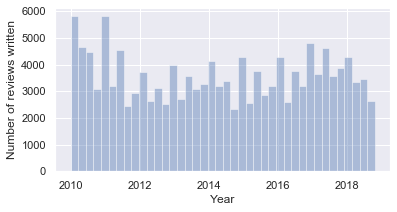

In [90]:
plt.figure(figsize=(6, 3))

sns.distplot(date_to_year_float(df.date), bins=40, kde=False)
plt.xlabel('Year')
plt.ylabel('Number of reviews written');

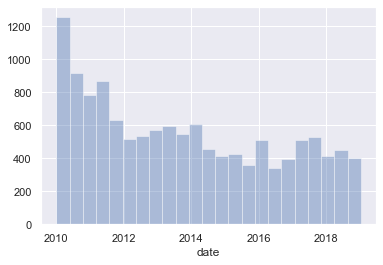

In [111]:
sns.distplot(date_to_year_float(df_agg.date), kde=False);